In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imdb import Cinemagoer

C:\Users\jakob\AppData\Local\Temp\ipykernel_7948\540188139.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dat = dat.append(pd.read_csv("watched-2022.csv",skiprows=3,dtype=str))


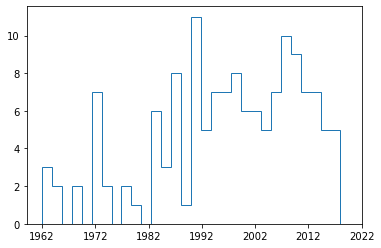

In [193]:
dat = pd.read_csv("watched-2021.csv",skiprows=3,dtype=str)
dat = dat.append(pd.read_csv("watched-2022.csv",skiprows=3,dtype=str))

years = np.array(dat["Year"]).astype(int)
names = np.array(dat["Name"]).astype(str)

a, b = np.histogram(years,bins = 15)

plt.hist(years[years<2019],bins = (max(years)-min(years))//2,histtype='step')
# plt.plot((b[1:]+b[:-1])/2,np.log(a),'.')
plt.xticks([min(years)+i*2*5 for i in range(7)])
plt.show()


In [3]:
set([i for i in range(1962,2022)]).difference(set(np.sort(years)))

{1966, 1967, 1969, 1970, 1971, 1974, 1976, 1979, 1981, 1982, 1986}

In [4]:
u_years, counts = np.unique(years,return_counts=1)

# plt.plot(u_years,counts,'.')
u_years[counts>5]

array([1973, 1991, 1997, 2019, 2021])

In [23]:
imdb = Cinemagoer()


In [39]:
movies = []

for n in names:
    try:
        movies.append(imdb.get_movie(imdb.search_movie(n)[0].movieID))
    except:
        print(n,"was not found")


2022-04-21 18:26:12,625 CRITICAL [imdbpy] C:\Users\jakob\Anaconda3\envs\pipenv\lib\site-packages\imdb\_exceptions.py:32: IMDbParserError exception raised; args: ('invalid title: """"',); kwds: {}
NoneType: None


Serenity was not found
Gremlins was not found
Hellboy II: The Golden Army was not found


In [71]:
actors = []
for m in movies:
    try:
        actors.append(np.array([a['name'] for a in m["actors"]]))
    except:
        actors.append(np.array([]))
actors = np.hstack(np.array(actors))

C:\Users\jakob\AppData\Local\Temp\ipykernel_7948\2743844847.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  actors = np.hstack(np.array(actors))


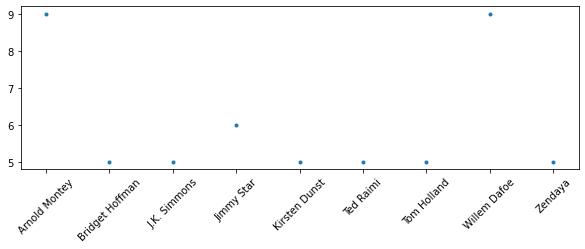

In [93]:
u_actors, counts = np.unique(actors,return_counts=1)
plt.figure(figsize=(10, 3))
plt.plot(u_actors[counts > 4],counts[counts > 4],'.')
plt.xticks(rotation=45)
plt.show()
# actors[0]['name']

In [126]:

directors = []
for m in movies:
    try:
        directors.append(m['director']['name'])
    except:
        try:
            directors.append([d['name'] for d in m['directors']])
        except:
            print(m)


directors.append("Joel Coen")
directors.append("Ethan Coen")
directors.append("Yeon Sang-ho")
directors.append("Rainer Werner Fassbinder")
directors.append("Peter Jackson")
directors = np.hstack(np.array(directors))

Fargo
Hellbound
World on a Wire
The Beatles: Get Back


C:\Users\jakob\AppData\Local\Temp\ipykernel_7948\982817874.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  directors = np.hstack(np.array(directors))


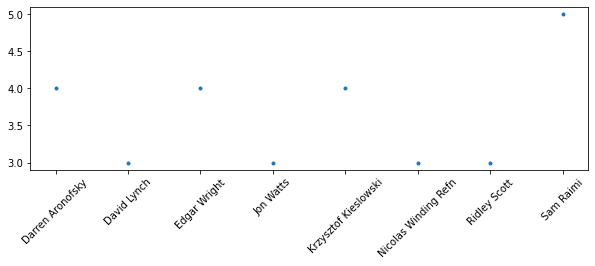

In [135]:
u_directors, counts = np.unique(directors,return_counts=1)

plt.figure(figsize=(10, 3))
plt.plot(u_directors[counts > 2],counts[counts > 2],'.')
plt.xticks(rotation=45)
plt.show()

In [145]:

countries = []
for m in movies:
    try:
        countries.append(m['country'])
    except:
        try:
            countries.append(m['countries'])
            # countries.append([d for d in m['directors']])
        except:
            theamd = m
            print(m)

countries.append("United States")
countries = np.hstack(np.array(countries))


The Amnesia Fortnight Movie


C:\Users\jakob\AppData\Local\Temp\ipykernel_7948\2507399231.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  countries = np.hstack(np.array(countries))


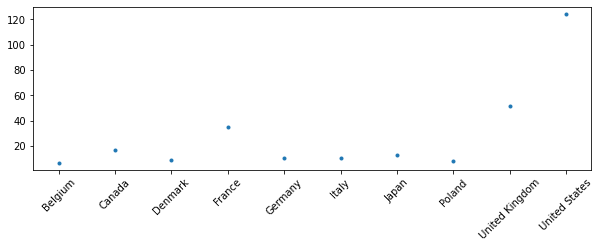

In [153]:
u_countries, counts = np.unique(countries,return_counts=1)

plt.figure(figsize=(10, 3))
plt.plot(u_countries[counts > 5],counts[counts > 5],'.')
plt.xticks(rotation=45)
plt.show()

In [159]:
ratings = []
for m in movies:
    try:
        ratings.append(m['rating'])
    except:
        print(m)

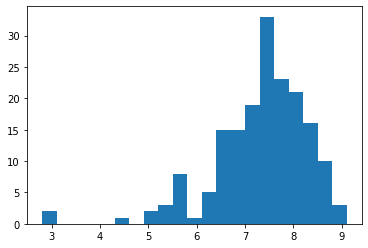

In [167]:
plt.hist(ratings, bins = 21)
plt.show()

In [183]:
asort = np.argsort(ratings)

print("Best movies:",movies[asort[-1]],movies[asort[-2]],movies[asort[-3]],"\nWorst movies:",movies[asort[0]],movies[asort[1]],movies[asort[2]],sep="\n")


Best movies:
The Beatles: Get Back
Schindler's List
Fargo

Worst movies:
Cats
Troll 2
Samurai Cop


In [186]:
movies[0].keys()

#TO CHECK
# runtimes, cinematographer


['original title',
 'localized title',
 'cast',
 'genres',
 'runtimes',
 'countries',
 'country codes',
 'language codes',
 'color info',
 'aspect ratio',
 'sound mix',
 'certificates',
 'original air date',
 'rating',
 'votes',
 'cover url',
 'imdbID',
 'plot outline',
 'languages',
 'title',
 'year',
 'kind',
 'director',
 'writer',
 'producer',
 'composer',
 'cinematographer',
 'editor',
 'editorial department',
 'casting director',
 'production design',
 'art direction',
 'production manager',
 'art department',
 'sound crew',
 'visual effects',
 'camera and electrical department',
 'animation department',
 'music department',
 'miscellaneous crew',
 'thanks',
 'akas',
 'production companies',
 'distributors',
 'special effects',
 'other companies',
 'plot',
 'canonical title',
 'long imdb title',
 'long imdb canonical title',
 'smart canonical title',
 'smart long imdb canonical title',
 'full-size cover url']